<a href="https://colab.research.google.com/github/judajuded2012/Customer_Personality_Analysis/blob/main/Customer_Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Importing Libraries**


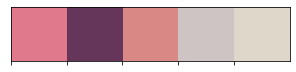

In [ ]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4','#dfd7ca']
sns.palplot(sns.color_palette(colors_nude))
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


###  **Loading the data**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Data set/marketing_campaign - marketing_campaign.csv')

 **Reading Data**

In [ ]:
data.head()



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### **Cleaning the data**

In [ ]:
counts = data.nunique()
counts

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [ ]:
data.drop(['Z_CostContact' ,'Z_Revenue'] , axis = 1 , inplace=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Mark and Remove Missing Data**

In [ ]:
data.Income.skew()


6.763487372811116

In [ ]:
data.fillna({'Income': data.Income.median()}, inplace=True)


In [ ]:
data.isna().sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

**Ploting data set**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e4a274a90>,
      dtype=object)

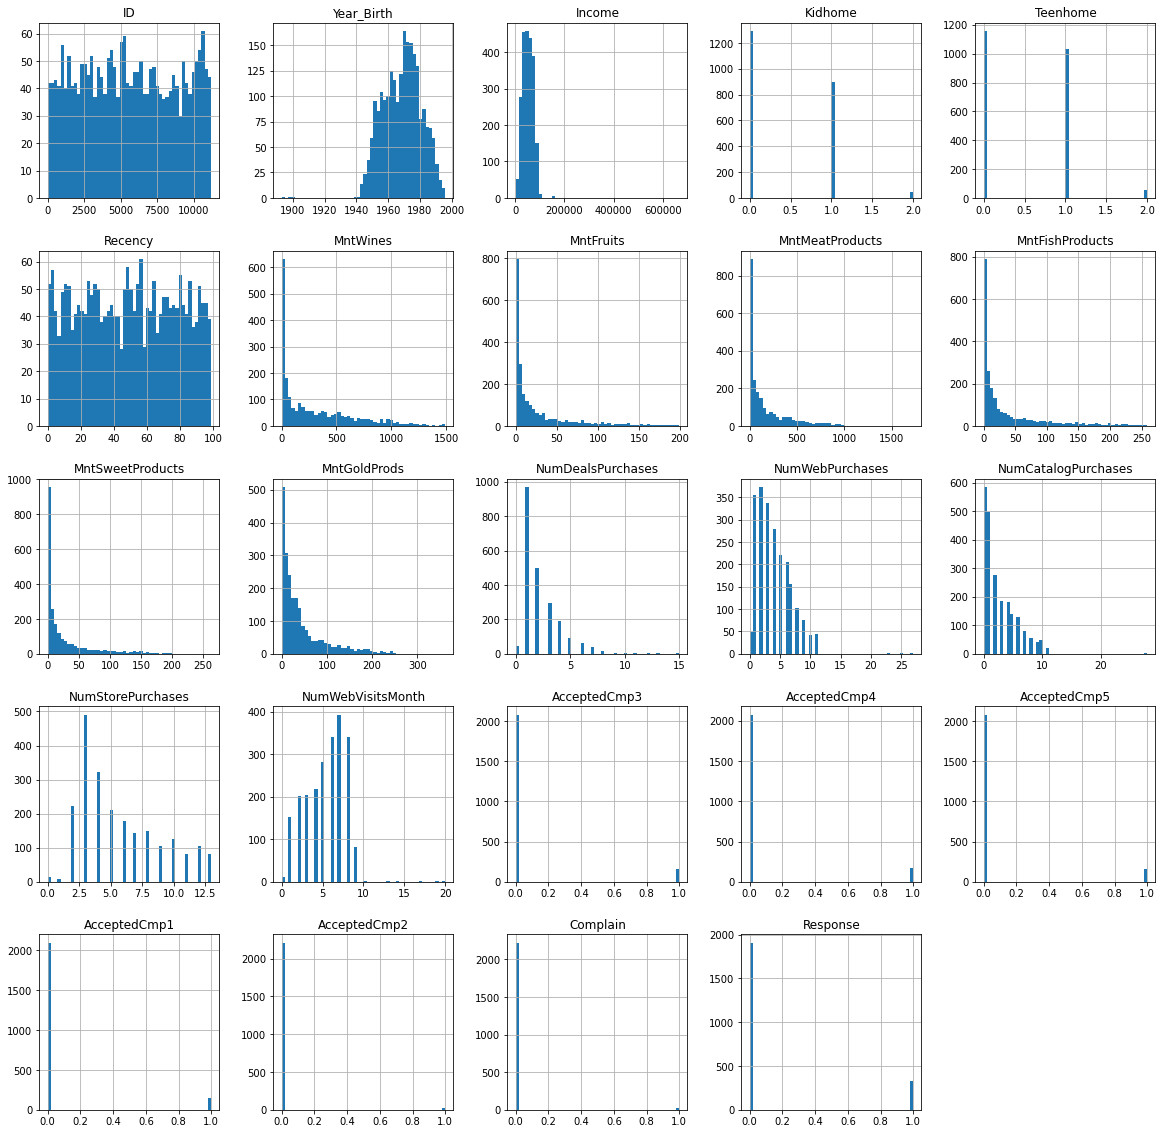

In [ ]:
data.hist(figsize = (20,20), bins = 50)


In [ ]:
data.Education.value_counts()


Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
data.Marital_Status.value_counts()


Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [ ]:
data['Year_Birth']=pd.DatetimeIndex(data['Year_Birth']).year


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

###**Encodindg Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE = LabelEncoder()

data["Education"] = LE.fit_transform(data["Education"])

data['Marital_Status'] = LE.fit_transform(data['Marital_Status'])




In [ ]:
from sklearn.preprocessing import StandardScaler

**Ploting Data Correlation**

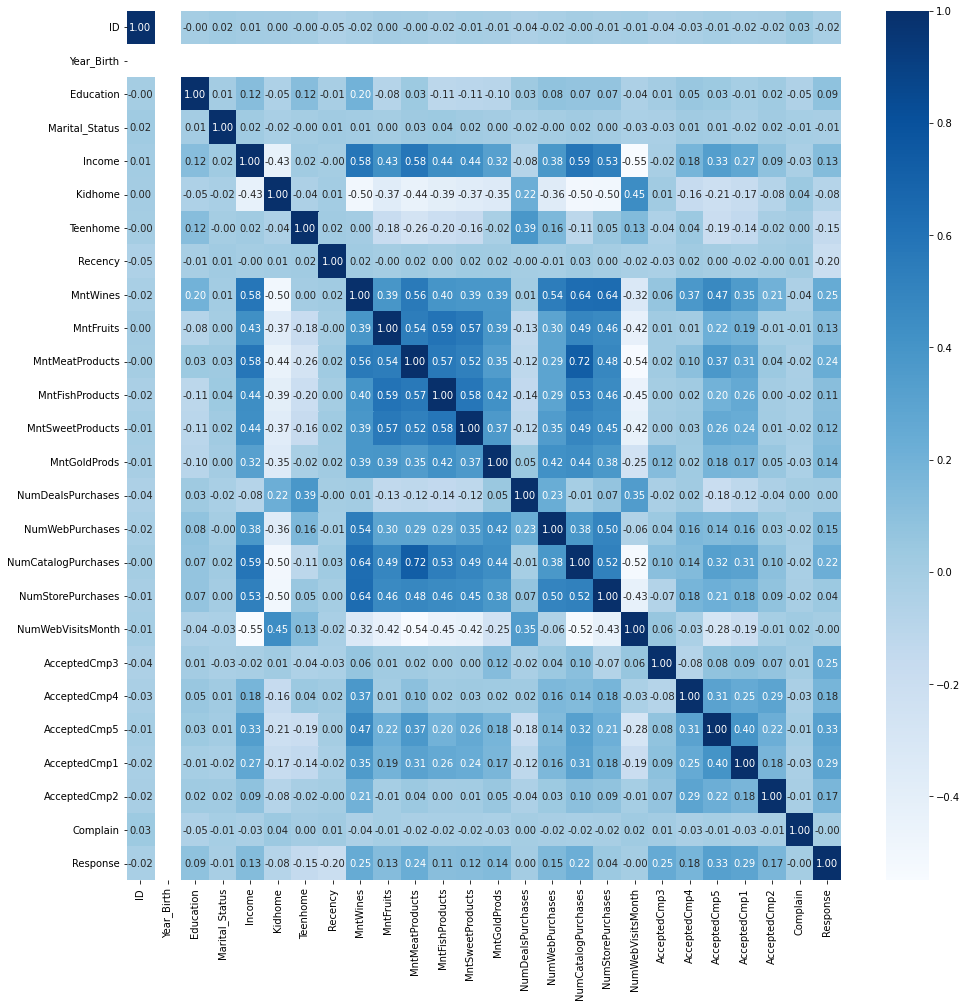

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.show()

###**Data Preprocessing**

In [ ]:
data['Age'] = 2015 - data['Year_Birth'] 

data['TotalAcceptedCmp'] = data[['AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5']].sum(axis=1)

data['TotalPurches'] = data[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']].sum(axis= 1)
data['Childrens'] = data[['Kidhome' , 'Teenhome']].sum(axis=1)  

data['Spending']=data[[ 'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].aggregate([sum] ,axis = 1)

data['Savings']=data['Income'] - data['Spending']

data['Education'] = data['Education'].replace(['2n Cycle','Graduation'],'Graduate') #simplifing education
data['Education'] = data['Education'].replace(['Basic'], 'Under Graduate')
data['Education'] = data['Education'].replace(['PhD','Master'], 'Post Graduate')



In [ ]:
data.drop(['ID' , 'Year_Birth' ,'Dt_Customer'  ] , axis=1 , inplace=True)


In [ ]:
data_copy = data.copy()
cat_col =  [x for x in data_copy.columns if ((data_copy[x].dtype != 'int64') & (data_copy[x].dtype != 'float64'))]
data_copy=pd.get_dummies(data_copy , columns=cat_col , drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
num_cols =  [x for x in data_copy.columns if ~((data_copy[x].dtype != 'int64') & (data_copy[x].dtype != 'float64'))]
Scaler = StandardScaler()
data_copy[num_cols] = Scaler.fit_transform(data_copy[num_cols])

###**Modeling** 


**Dimensionality Reduction using PCA **


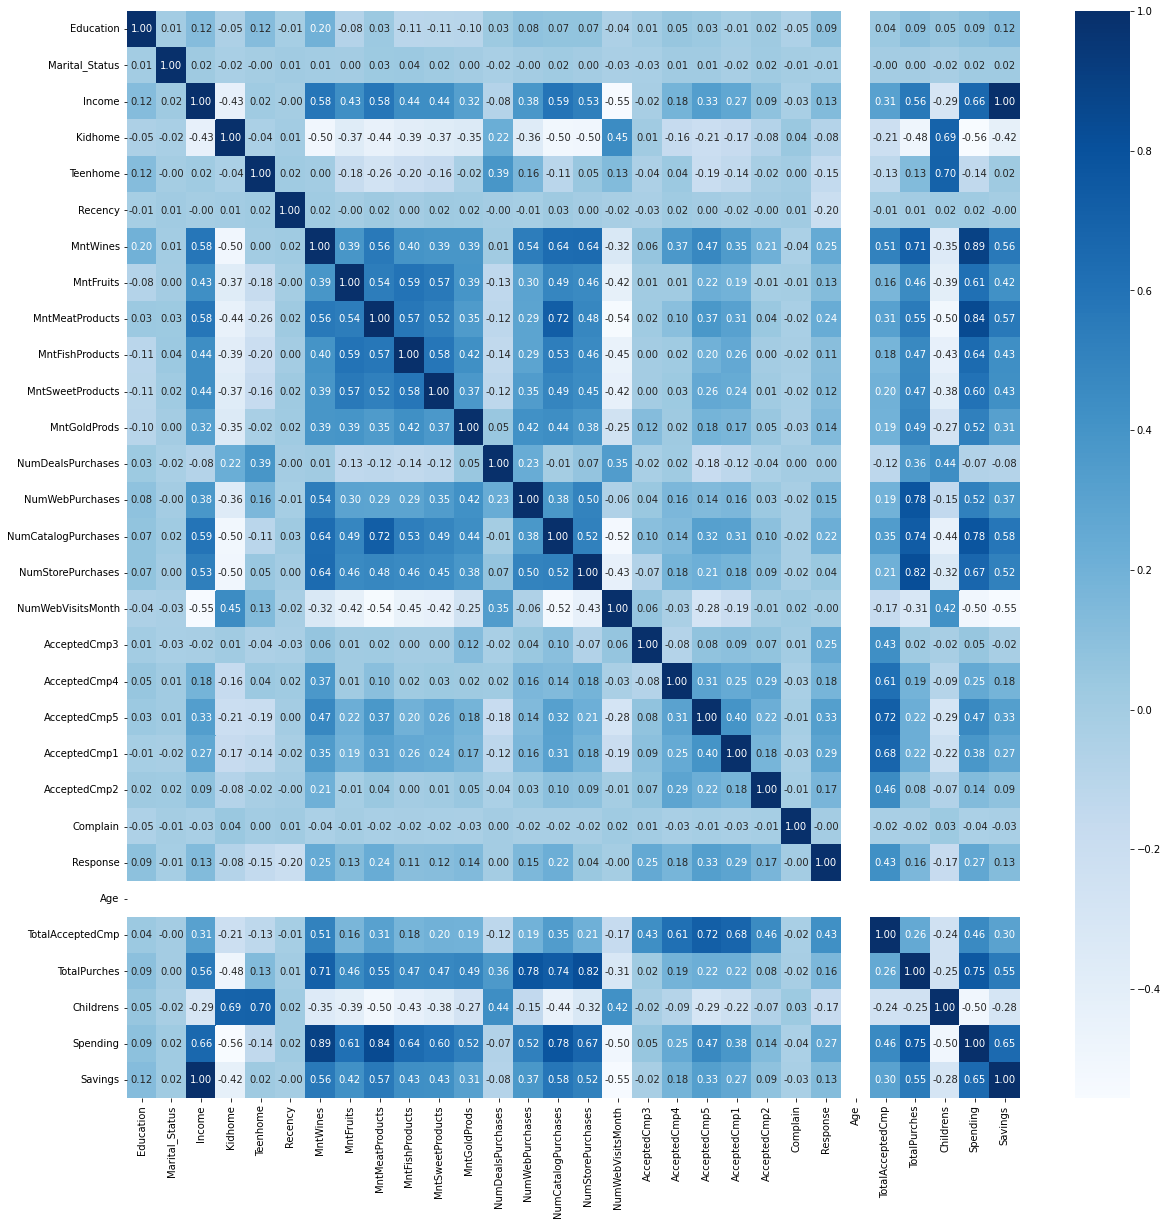

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data_copy.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.show()

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
pca = PCA(n_components = 3)
pca.fit(data_copy)
reduced_data= pd.DataFrame(pca.transform(data_copy))

print("Current number of features= ",len(reduced_data.columns))

Current number of features=  3


In [ ]:
reduced_data

,0,1,2
0,4.182753,-0.763050,-0.965497
1,-3.072721,0.065614,0.046106
2,1.991167,-0.984270,-1.284986
3,-2.918113,0.700849,-0.932609
4,-0.286655,-1.050716,0.192381
...,...,...,...
2235,2.413820,-1.950127,0.162430
2236,-0.866419,-0.340950,4.343225
2237,2.257401,1.063872,0.379865
2238,1.906648,-1.788185,0.123200


In [ ]:
pca = PCA(n_components=3, random_state=42)
reduced_data = pca.fit_transform(data_copy)
reduced_data = pd.DataFrame(reduced_data, columns=['Column1', 'Column2', 'Column3'])

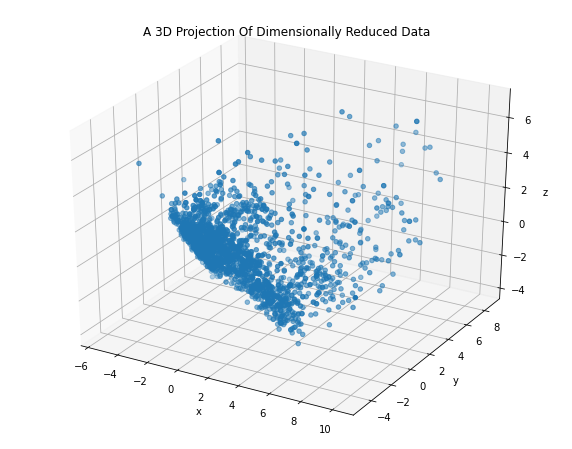

In [ ]:
x = reduced_data['Column1']
y = reduced_data['Column2']
z = reduced_data['Column3']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o" )
ax.set_title("A 3D Projection Of Dimensionally Reduced Data")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

**Run the Elbow Method**

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

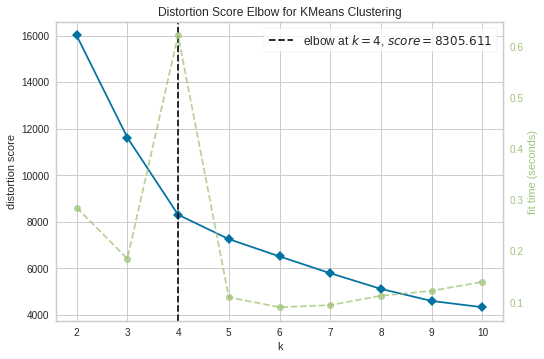

In [ ]:
kmeans = KMeans()
elbow_method = KElbowVisualizer(kmeans)
elbow_method.fit(reduced_data)
elbow_method.show()
plt.show()

**Searching for the best numbers of clustering - elbow method**

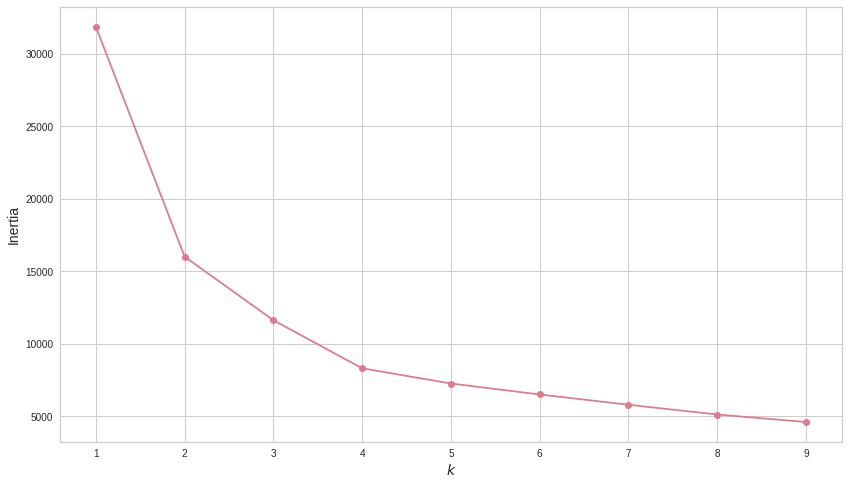

In [ ]:
plt.figure(figsize = (14,8))

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(reduced_data)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(1, 10), inertias, "bo-" ,color= colors_nude[0])
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.show()

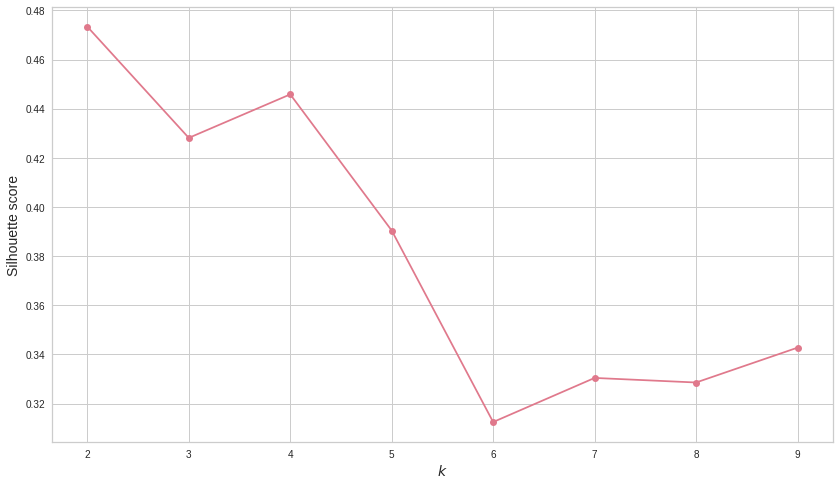

In [ ]:
plt.figure(figsize = (14,8) )
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(reduced_data, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.plot(range(2, 10), silhouette_scores, "bo-" ,color=colors_nude[0])
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [ ]:
clusters = KMeans(n_clusters=2, random_state=42).fit(reduced_data)
data["Personality"]= clusters.labels_

# **Ploting Cluster**

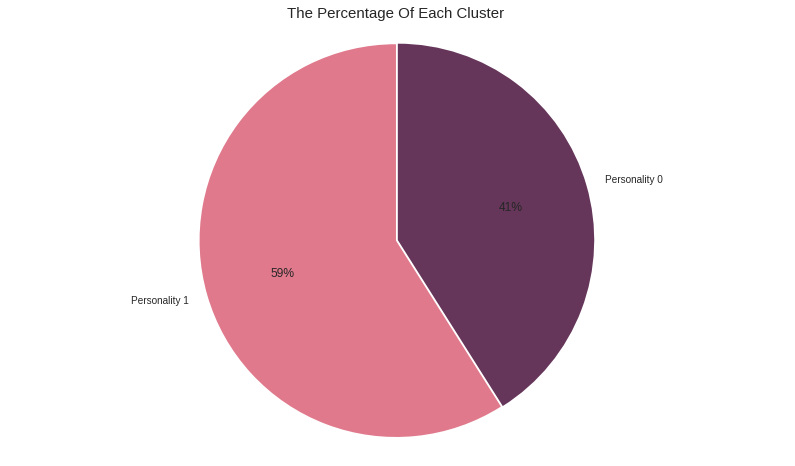

In [ ]:
plt.figure(figsize = (14,8) )
plt.pie(list(data['Personality'].value_counts()),labels=['Personality 1' , 'Personality 0'],
        autopct='%.00f%%' ,colors=colors_nude, startangle=90  , explode =(0.01,0))
plt.title('The Percentage Of Each Cluster ' ,fontsize = 15)
plt.axis('equal')
plt.show()

**Age Distribution of each cluster**

In [ ]:
clus0 = data[(data['Age'] > 40 )&(data['Personality'] == 0)]
clus1 = data[(data['Age'] > 40 )&(data['Personality'] == 1)]
print('percentage of customer more than 40 at cluster0 : {0:0.2f}%'.format(len(clus0) / len(data[data['Personality'] == 0] )))
print('percentage of customer more than 40 at cluster1 : {0:0.2f}%'.format(len(clus1) / len(data[data['Personality'] == 1])))

percentage of customer more than 40 at cluster0 : 1.00%
percentage of customer more than 40 at cluster1 : 1.00%


In [ ]:
len(data['Personality'] == 0)


2240

**Income Distribution of each cluster**

In [ ]:
data.groupby(['Personality'])['Income'].describe()


,count,mean,std,min,25%,50%,75%,max
Personality,,,,,,,,
0,1321.0,38637.621499,15131.713902,1730.0,28427.0,38201.0,48721.0,162397.0
1,919.0,71787.559304,23473.310172,2447.0,63228.5,70971.0,79492.5,666666.0


**Kids number of each cluster**

In [ ]:
kids_1 = len(data[(data['Childrens'] > 0) &(data['Personality'] == 1)]) / len(data)
kids_0 = len(data[(data['Childrens'] > 0) &(data['Personality'] == 0)]) / len(data)
print('Probability of having children at cluster 0 is {0:0.2f}%'.format(kids_0))
print('Probability of having children at cluster 1 is {0:0.2f}%'.format(kids_1))

Probability of having children at cluster 0 is 0.53%
Probability of having children at cluster 1 is 0.19%


**Main product of each cluster**

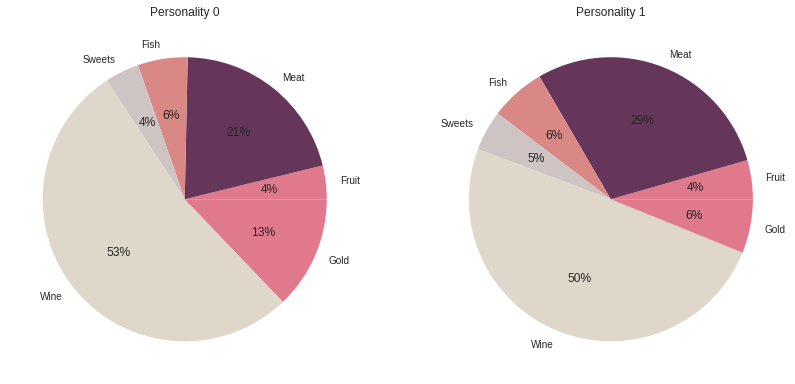

In [ ]:
plt.figure(figsize = (14,8) )
labels = ['Fruit' , 'Meat' , 'Fish' , 'Sweets' , 'Wine' , 'Gold']
for i in range(2):
    counts =[]
    d = data[data['Personality'] == i]
    counts.append(d['MntFruits'].sum())
    counts.append(d['MntMeatProducts'].sum())    
    counts.append(d['MntFishProducts'].sum())    
    counts.append(d['MntSweetProducts'].sum())    
    counts.append(d['MntWines'].sum())
    counts.append(d['MntGoldProds'].sum())
    plt.subplot(1,2,i+1)
    plt.title("Personality "+str(i))
    plt.pie(counts, labels = labels, autopct='%.0f%%' ,colors=colors_nude)
plt.show()

**Education of each cluster**

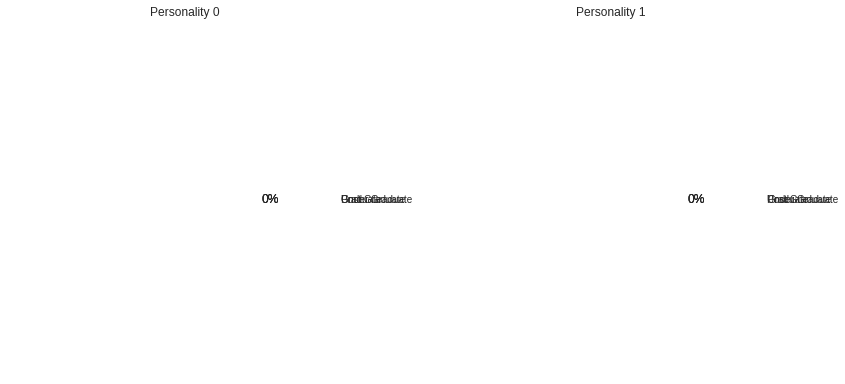

In [ ]:
plt.figure(figsize = (14,8) )
education =['Graduate', 'Post Graduate', 'Under Graduate']
for i in range(2):
    counts =[]
    d = data[data['Personality'] == i]
    counts.append(len(d[d['Education'] == 'Graduate']))
    counts.append(len(d[d['Education'] == 'Post Graduate']))    
    counts.append(len(d[d['Education'] == 'Under Graduate']))    
    plt.subplot(1,2,i+1)
    plt.title("Personality "+str(i))
    plt.pie(counts, labels = education, autopct='%.0f%%' ,colors=colors_nude)
plt.show()